<a href="https://colab.research.google.com/github/XavierCarrera/Tutorial-Machine-Learning-Regresion-Lineal/blob/main/1_Regresi%C3%B3n_lineal_y_estad%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

En esta primera parte veremos los conceptos de promedio, distribución estándard y coeficiente de correlación. 

Para trabjar en estos conceptos, utilizaremos el [dataset de pingüinos](https://github.com/allisonhorst/palmerpenguins) que viene precargado en la librería Seaborn. En esta podemos encontrar información de tres tipos de especies y en donde podemos analizar los siguientes valores numéricos:

* bill_length_mm: longitud del pico en milímetros
* bill_depth_mm: profunidad del pico en milímetros
* flipper_length_mm: longitud de las alas en milímetros
* body_mass_g: masa corporal en gramos

Las librerías que utilizamos son:

* **Numpy** que tiene precargadas funciones para manejar vectores y matrices.
* **Scipy** que tiene modulos para funciones estadísticas. En este caso utilizaremos el módulo norm para crear la distribución normal.
* **Pandas** que nos permite trabajar con matrices como tablas.
* **Seaborn** y **Matplotlib** para visualizar datos.

In [15]:
import numpy as np
from scipy.stats import norm 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

El dataset de penguinos forma parte de Seaborn, por lo que solo tenemos que cargarlo con la función *load_dataset*.

In [2]:
df = sns.load_dataset("penguins")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## Promedio, Desviaciones Estándard y Distribución Normal

Es muy sencillo obtener la información estadística fundamental de nuestros data points usando el método *describe*.

In [3]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Esta información es más útil si la podemos graficar. Para esto, utilizaremos los datos sobre la masa corporal de los pingüinos. Debemos entonces utilizar los siguientes valores:

* mu: promedio (calculable con la función *mean*)
* sigma: desviación estándard (calculable con la función *std*)
* x1 y x2: límites inferiores y superiores entre los cuales se encuentran la mayoría de nuestros datos.



In [20]:
mu = df["body_mass_g"].mean() 
sigma = df["body_mass_g"].std() 
x1 =  3550
x2 = 4750

Ahora debemos calcular las unidades tipificadas (z1 y z2) de nuestros límites superiores e inferiores. 

Habiendo hecho esto, podemos crear una distrubición normal de nuestros data points con el módulo *norm*.

In [ ]:
z1 = ( x1 - mu ) / sigma
z2 = ( x2 - mu ) / sigma

x = np.arange(z1, z2, 0.001) 
x_all = np.arange(-10, 10, 0.001) 
y = norm.pdf(x,0,1)
y2 = norm.pdf(x_all,0,1)

Finalmente, tenemos que pasar nuestras variables a Matlplotlib para que dibuje la distribución de nuestros datos. 

No te preocupes tanto por el código y las ecuaciones que acabamos de realizar, sino por entender los teóricamente los conceptos que estamos aquí discutiendo.

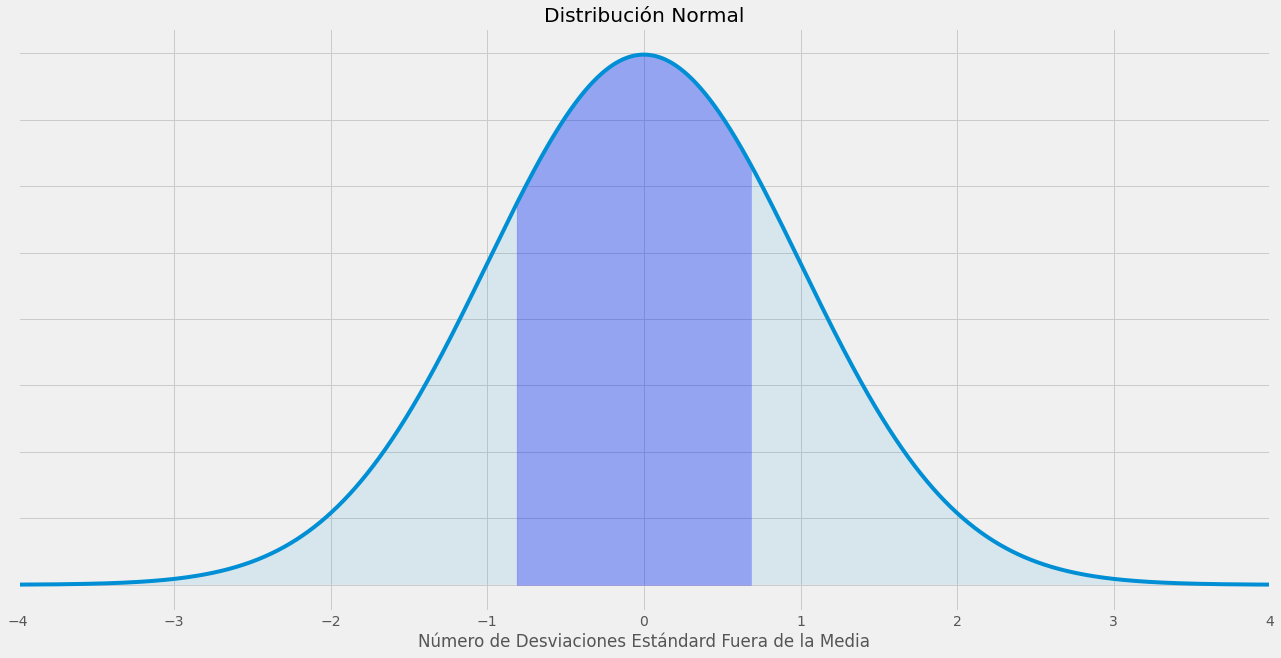

In [23]:
fig, ax = plt.subplots(figsize=(20,10))
plt.style.use('fivethirtyeight')
ax.plot(x_all,y2)

ax.fill_between(x,y,0, alpha=0.3, color='b')
ax.fill_between(x_all,y2,0, alpha=0.1)
ax.set_xlim([-4,4])
ax.set_xlabel('Número de Desviaciones Estándard Fuera de la Media')
ax.set_yticklabels([])
ax.set_title('Distribución Normal')

plt.show()

Lo que podemos ver de nuestra distribución normal (identificable por la forma de curva) es que la mayoría de nuestros datos están a menos de una desviación estándard del promedio de datos.

Esto es bueno porque podremos generalizar nuestros datos más fácilmente.

## Relaciones Lineares

Existen formas más sencillas para realizar lo que acabamos de hacer. Con la función *pairplot* podemos rápidamente visualizar la distribución de nuestros datos y cruzar datos en gráficos de dispersión.

Los parámetros que hemos pasado son:

* *hue*: con el cual podemos dividir los datapoints según etiquetas (en este caso especies de pingüinos).
* *markers*: que son una leyenda para identificar más fácilmente nuestros data points. 

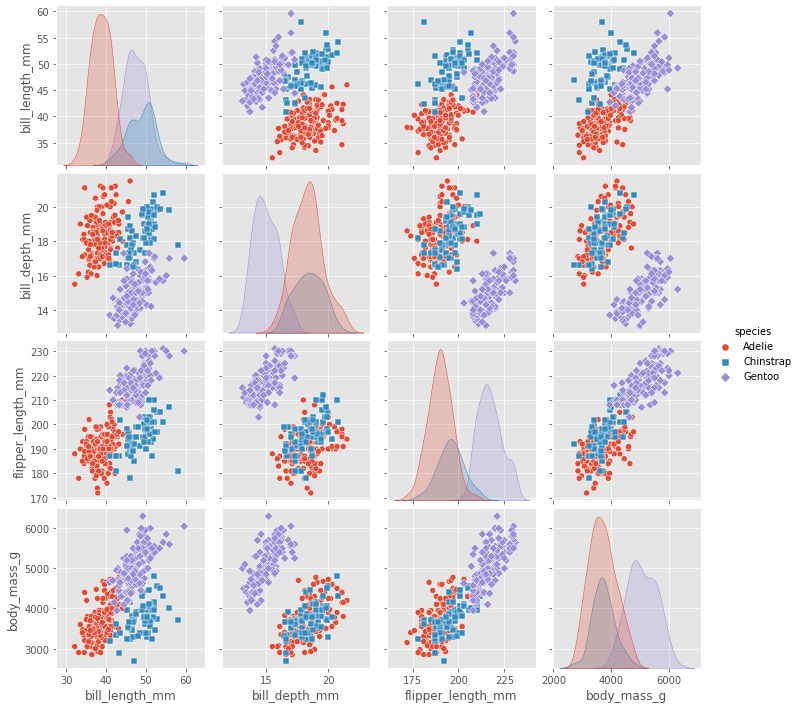

In [14]:
sns.pairplot(df, hue="species", markers=["o", "s", "D"])

A bote pronto, podemos ver que cuando cruzamos datos en nuestros gráficos encontramos relaciones lineares entre nuestros valores. Esto parece especialmente cierto cuando comparamos la masa corporal con otros valores.

Para observarlo más fácilmente, grafiquemos a la masa corporal en nuestro eje y (valor a predecir o valor dependiente) y a longitud del pico en el eje x (valor predictor o valor independiente).

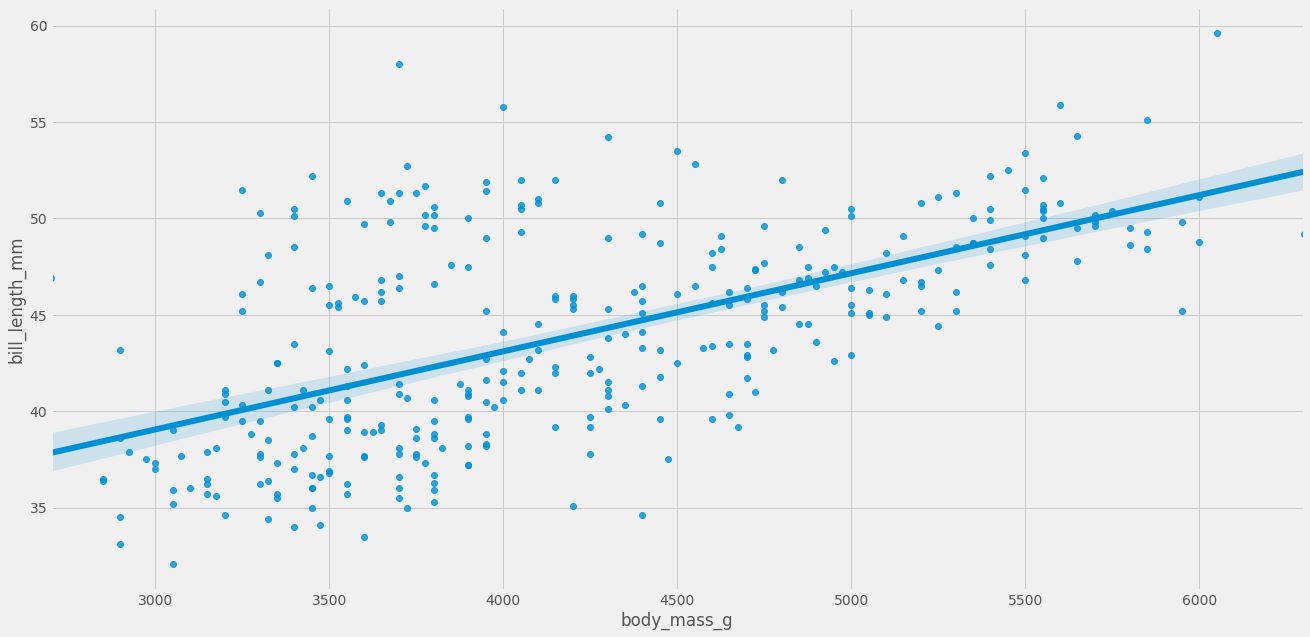

In [24]:
sns.regplot(x=df["body_mass_g"], y=df["bill_length_mm"])

En este momento hemos hecho una hipótesis en la que suponemos que la masa corporal de un pingüino está correlacionado con la longitud de su pico. 

Algo que podemos ver es que la función *regplot* calcula automática la línea de mejor ajuste, con lo que podemos tener una idea de como podemos extrapolar datos.

## Coeficiente de correlación

Debido a que tenemos una línea ascendente en nuestro últimos gŕafico, podemos saber ya que el coeficiente de correlación estará cercano a 1. Es decir, hay un correlación positiva (entre más pesa un pingüino, más largo es su pico).

Para comprobar esto, vamos a usar la función *corr* para calcular automáticamente el coeficiente de correlación. Finalmente, podemos usar *heatmap* para generar un mapa de calor de nuestras columnas.

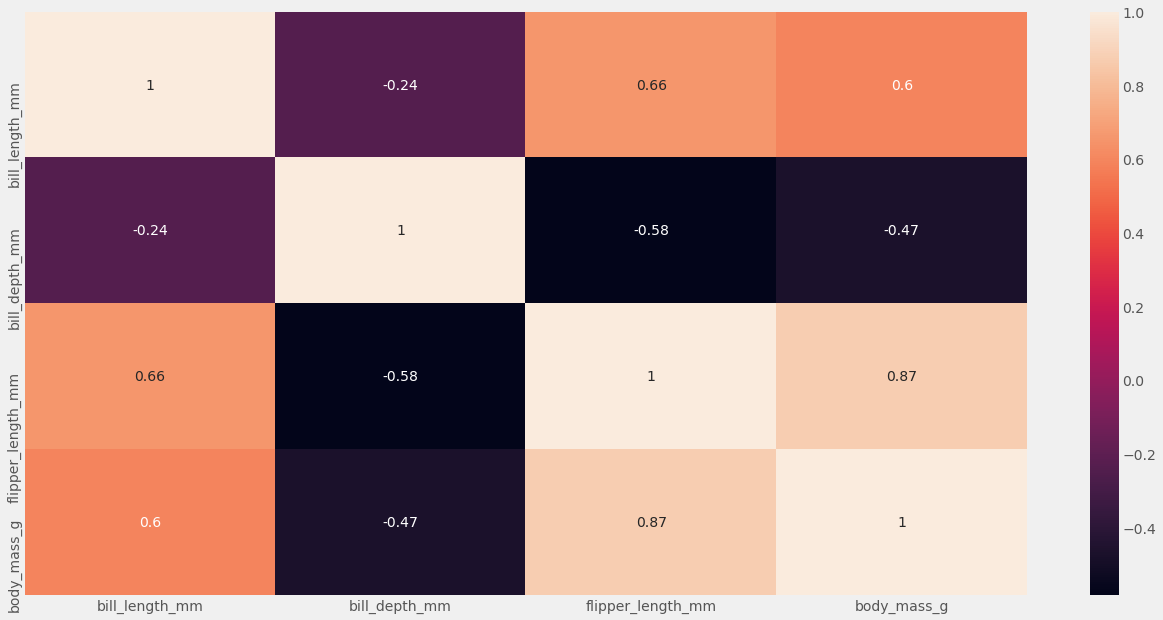

In [22]:
corr = df.corr()
sns.heatmap(corr, annot = True, yticklabels=corr.columns, xticklabels=corr.columns)

En este momento hemos cumplido con el objetivo de calcular el coeficiente de correlación de todas nuestras columnas.

Como lo habíamos mencionado, la masa corporal es un factor correlacionado positivamente con los otros tres valores numéricos. Como veremos en los siguientes notebooks, podríamos consecuentemente utilizar esta función para predecir el resto de valores de interés.